In [26]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
from functionLibrary import convertDateTime
import random

In [27]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [29]:
print("Shape: ", df.shape)
print("Columns: ", df.columns)

Shape:  (300698, 53)
Columns:  Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segme

In [30]:
to_drop = ['Agency Name', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Resolution Action Updated Date',
       'Community Board', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Facility Type', 
       'Landmark', 'Incident Zip', 'Status', 'Resolution Description', 
       'Incident Address', 'Due Date']

In [31]:
df= df.drop(columns=to_drop, axis=1)

In [32]:
temp = df.copy()
df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,City,Borough,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BRONX,BRONX,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,BRONX,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,QUEENS,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,BROOKLYN,BROOKLYN,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NEW YORK,MANHATTAN,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BRONX,BRONX,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,KEW GARDENS,QUEENS,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,BROOKLYN,"(40.623793065806524, -73.99953890121567)"


In [33]:
# analyse null values 
df.isnull().sum()

Unique Key           0
Created Date         0
Closed Date       2164
Agency               0
Complaint Type       0
Descriptor        5914
Location Type      131
City              2614
Borough              0
Location          3540
dtype: int64

<AxesSubplot:>

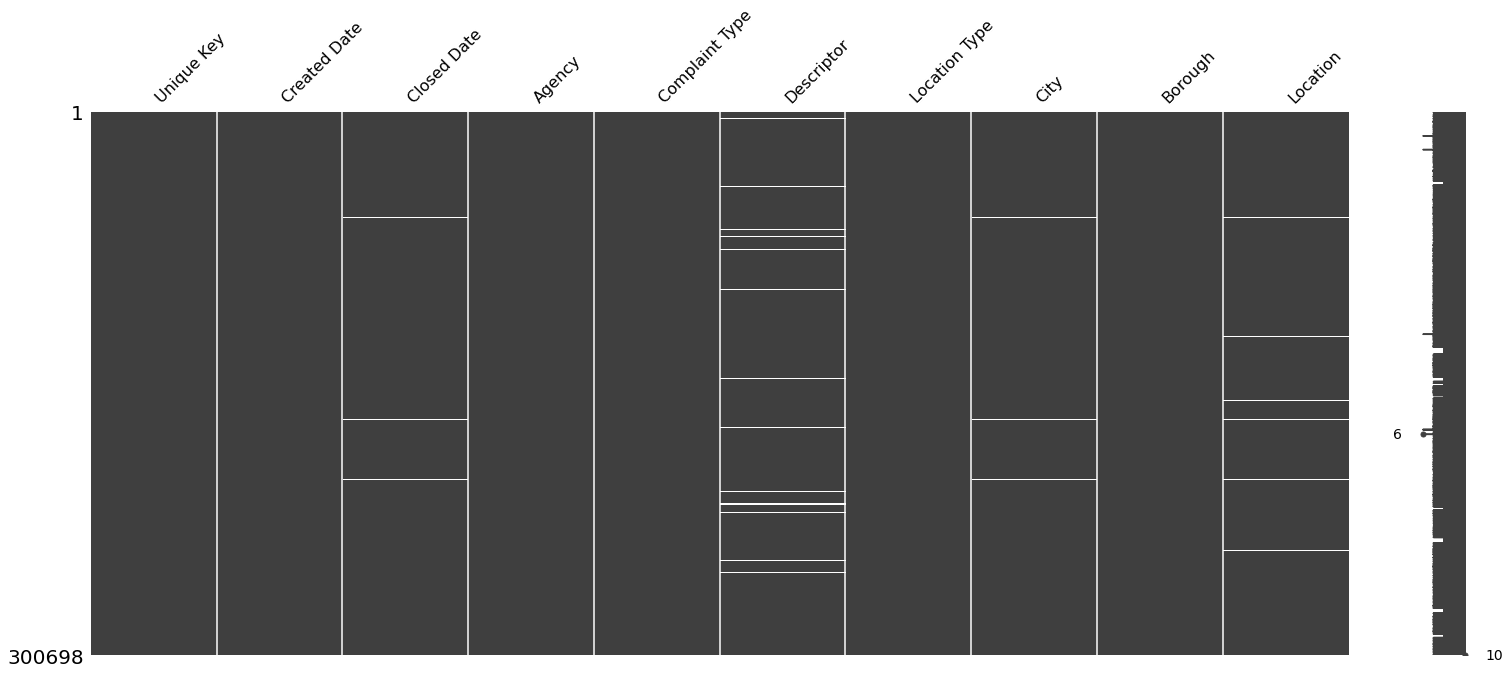

In [34]:
msno.matrix(df)

* Getting rid of Null values from location, closed date etc.

In [35]:
df = df[df['Location'].notna() & df['City'].notna() & df['Location Type'].notna() & df['Closed Date'].notna() & df['Descriptor'].notna()]

In [ ]:
# change the cases as they are treated as seperate cities.
df['City'] = df['City'].apply(lambda x: x.lower()) 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291109 entries, 0 to 300697
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unique Key      291109 non-null  int64 
 1   Created Date    291109 non-null  object
 2   Closed Date     291109 non-null  object
 3   Agency          291109 non-null  object
 4   Complaint Type  291109 non-null  object
 5   Descriptor      291109 non-null  object
 6   Location Type   291109 non-null  object
 7   City            291109 non-null  object
 8   Borough         291109 non-null  object
 9   Location        291109 non-null  object
dtypes: int64(1), object(9)
memory usage: 24.4+ MB


In [37]:
print("Shape after dropping Null values:", df.shape)
print(df.isnull().sum())

Shape after dropping Null values: (291109, 10)
Unique Key        0
Created Date      0
Closed Date       0
Agency            0
Complaint Type    0
Descriptor        0
Location Type     0
City              0
Borough           0
Location          0
dtype: int64


# Task 2
* Convert 'Created Date' and 'Closed Date' columns to dateTime64 object
* Subtract columns directly. 

In [38]:
df['Created Date'] = df['Created Date'].apply(lambda dateTime: convertDateTime(dateTime))
df['Closed Date'] = df['Closed Date'].apply(lambda dateTime: convertDateTime(dateTime))

In [39]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

df['Days'] = df['Request_Closing_Time'].apply(lambda x: pd.Timedelta(x).days)

# Task 3

# Task 4

In [40]:
'''
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them 
for different locations
'''

'\nOrder the complaint types based on the average ‘Request_Closing_Time’, grouping them \nfor different locations\n'

In [41]:
meanRequestTime = df['Request_Closing_Time'].mean()
print("Average Response Time:", meanRequestTime)

Average Response Time: 0 days 04:18:32.023881089


In [42]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,City,Borough,Location,Request_Closing_Time,Days
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,MANHATTAN,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,0
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,QUEENS,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,0
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BRONX,BRONX,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,0
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,BRONX,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,0
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,QUEENS,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,0


In [43]:
print(df['Request_Closing_Time'].unique())

[  3360000000000   5220000000000  17520000000000 ... 530580000000000
 530760000000000 203040000000000]


In [44]:
meanRequestTime = df['Request_Closing_Time'].mean()
print(meanRequestTime)

0 days 04:18:32.023881089
